In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df_despesas = pd.read_excel('alimenticia_senai_tratado.xlsx', sheet_name='despesas')
df_orcamento = pd.read_excel('alimenticia_senai_tratado.xlsx', sheet_name='orcamento')
df_despesas

,id_despesa,data,tipo,setor,valor,fornecedor
0,1,2024-08-18,Salário,Financeiro,11670.10,Teixeira
1,2,2024-09-15,Água,Logística,17394.82,Nunes
2,3,2024-08-22,Água,Financeiro,19787.46,Moura S/A
3,4,2024-09-02,Matéria-prima,Produção,2159.77,Barros
4,5,2025-02-02,Internet,RH,7390.20,Mendes - EI
...,...,...,...,...,...,...
169,196,2024-10-03,Energia,Produção,15225.10,da Cunha Mendes e Filhos
170,197,2024-07-19,Salário,RH,16460.68,Pires e Filhos
171,198,2024-10-27,Água,Financeiro,12795.28,Nascimento
172,199,2024-08-17,Matéria-prima,Logística,9634.17,da Costa


In [15]:
df_orcamento

,setor,mes,ano,valor_previsto,valor_realizado
0,Produção,Jan,2024,14045.42,15524.52
1,Produção,Fev,2024,42597.50,45075.42
2,Produção,Mar,2024,39491.52,44155.59
3,Produção,Abr,2024,52992.06,59965.36
4,Produção,Mai,2024,16198.93,15988.45
...,...,...,...,...,...
115,Comercial,Ago,2025,73532.49,63496.66
116,Comercial,Set,2025,46526.55,270703.31
117,Comercial,Out,2025,42068.07,43491.56
118,Comercial,Nov,2025,79706.26,92876.93


[]

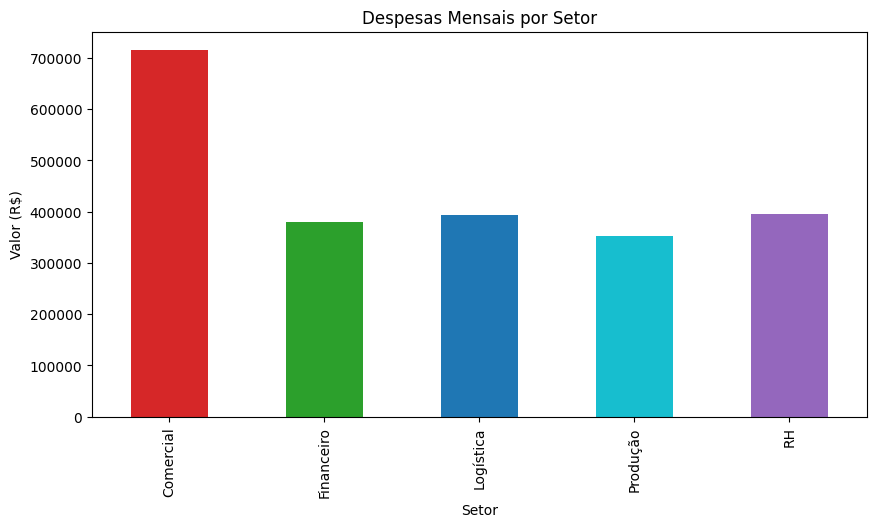

In [66]:
# Como estão distribuídas as despesas mensais por área (RH, transporte, comercial...)?

despesa_por_setor = df_despesas.groupby('setor')['valor'].sum()

plt.figure(figsize=(10,5))
despesa_por_setor.plot(kind='bar', title='Despesas Mensais por Setor', color=['tab:red', 'tab:green', 'tab:blue', 'tab:cyan', 'tab:purple'])
plt.xlabel('Setor')
plt.ylabel('Valor (R$)')
plt.plot()

# Comercial tem o maior gasto com despesas

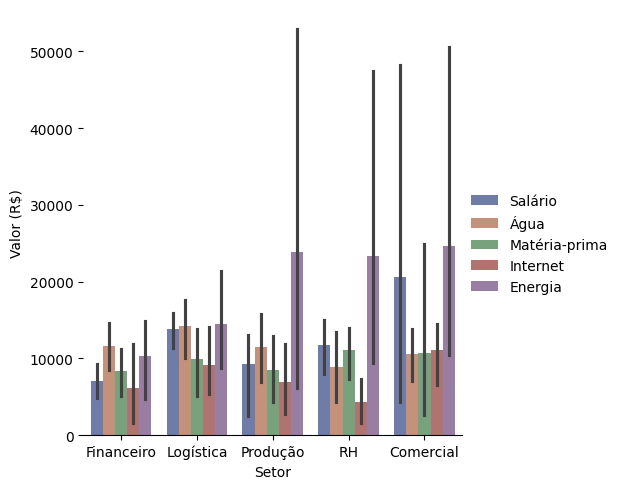

In [17]:
# Quais áreas têm maior custo com pessoal, materiais, logística? 

import seaborn as sns

despesa_por_tipo_setor = sns.catplot(
    data=df_despesas, kind='bar',
    x="setor", y="valor", hue="tipo",
    palette="dark", alpha=.6
)
despesa_por_tipo_setor.despine(left=True)
despesa_por_tipo_setor.set_axis_labels("Setor", "Valor (R$)")
despesa_por_tipo_setor.legend.set_title("")

# Todos gastam mais com energia, exceto o setor Financeiro, que gasta com Água

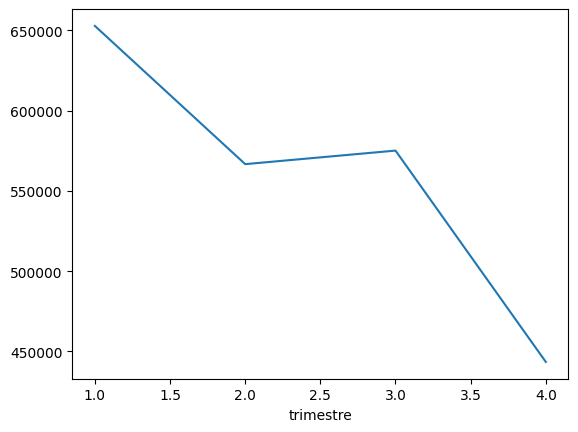

In [69]:
# Qual o perfil de gastos nos últimos trimestres? Alguma sazonalidade? 

df_despesas['trimestre'] = df_despesas['data'].dt.quarter

despesa_por_trimestre = df_despesas.groupby('trimestre')['valor'].sum()

despesa_por_trimestre.plot(kind='line', rot=0)
plt.show()

# Houve uma queda de 200 mil reais com despesas do 1o ao 4o semestre
# Caiu cerca de 100 mil do 1o para o 2o, estabilizou e caiu mias 100 mil do 3o pro 4o

<Axes: ylabel='fornecedor'>

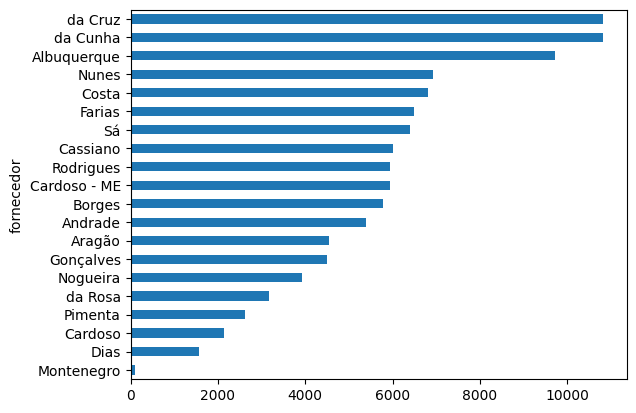

In [74]:
# Há fornecedores ou categorias com variações anormais de custo?   

variacao = df_despesas.groupby('fornecedor')['valor'].std().sort_values(ascending=True).head(20)

variacao.plot(kind='barh')

# Os fornecedors 'da Cruz', 'da Cunha' e 'Albuquerque' aprensenta uma dispersao de aproximadamente 10 mil reais

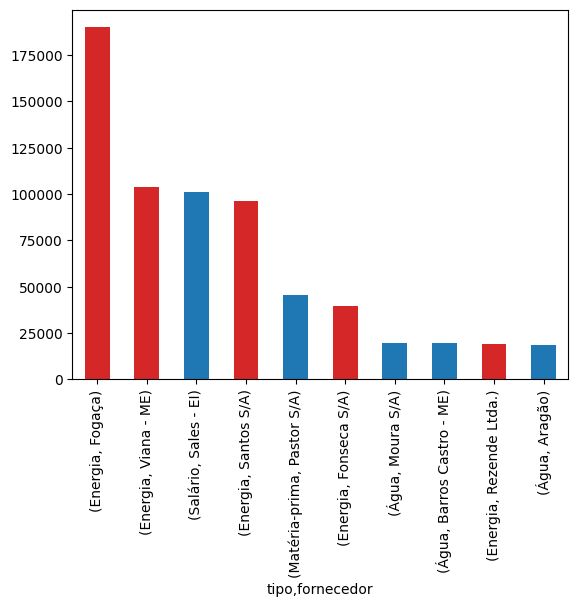

In [100]:
fornecedores = df_despesas.groupby(['tipo', 'fornecedor'])['valor'].mean().sort_values(ascending=False).head(10)

fornecedores.plot(kind='bar', rot=90, color=['tab:red', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:blue', 'tab:red', 'tab:blue'])
plt.show()

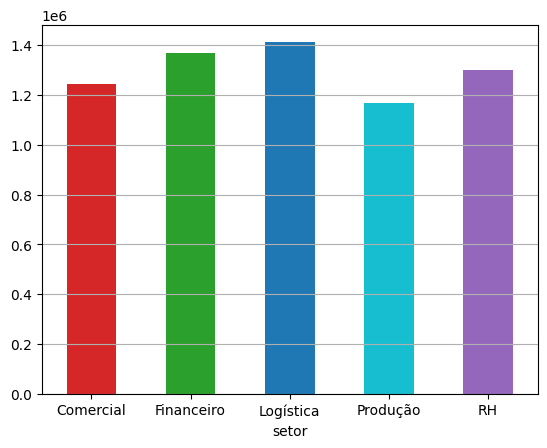

In [89]:
orcamento_previsto = df_orcamento.groupby('setor')['valor_previsto'].sum()
orcamento_previsto.plot(kind='bar', color=['tab:red', 'tab:green', 'tab:blue', 'tab:cyan', 'tab:purple'], rot=0)
plt.grid(axis='y')
plt.show()

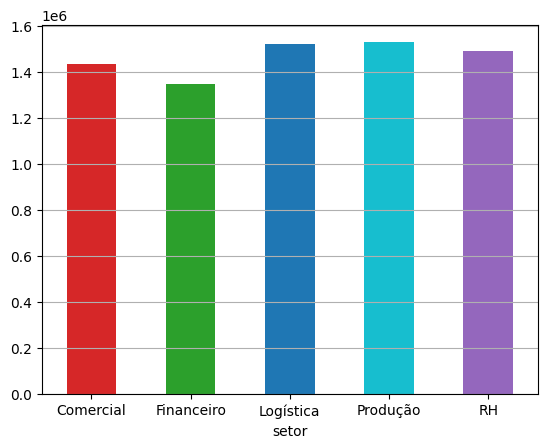

In [91]:
orcamento_realizado = df_orcamento.groupby('setor')['valor_realizado'].sum()

orcamento_realizado.plot(kind='bar', color=['tab:red', 'tab:green', 'tab:blue', 'tab:cyan', 'tab:purple'], rot=0)
plt.grid(axis='y')
plt.show()

# O setor de producao teve um nivel muito acima de orcamento

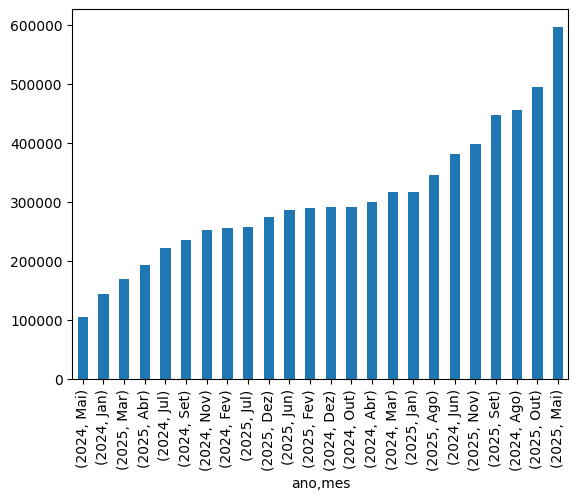

In [61]:
orcamento_trimestre = df_orcamento.groupby(['ano', 'mes'])['valor_realizado'].sum().sort_values()

orcamento_trimestre.plot(kind='bar')
plt.show()

# Orcamento cresceu quase 500mil em 1 ano -> 